In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Skip this cell

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!unzip "/content/drive/My Drive/AgoraDevWeek22/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
# Change the folder name from asl_alphabet_tran to tran
# Create a new folder validation and create sub directories: A-Z, nothing, del & space

In [ ]:
import os
import random
import shutil

subDir = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
          'Y', 'Z', 'del', 'nothing', 'space']
for alphaDir in subDir:
  finalPathSrc = '/content/asl_alphabet_train/train/' + alphaDir + '/'
  finalPathDes = '/content/asl_alphabet_train/validation/' + alphaDir + '/'
  for i in range(600):
    name1 = random.choice(os.listdir(finalPathSrc))
    shutil.move(finalPathSrc+name1, finalPathDes)
  print(alphaDir)
  #print(name1, len(os.listdir(finalPathSrc)))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
nothing
space


In [ ]:
rmdir /content/asl_alphabet_train/validation/.ipynb_checkpoints

In [ ]:
#prep

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# size of the image
pic_size = 48

# input path for the images
base_path = '/content/asl_alphabet_train/'

from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 100

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
print(validation_generator.class_indices)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [ ]:
#defining the model

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# number of possible label values
nb_classes = 29

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#start training

epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
696/696 [==============================] - 139s 182ms/step - loss: 2.4864 - accuracy: 0.2786 - val_loss: 2.1419 - val_accuracy: 0.3719
Epoch 2/50
696/696 [==============================] - 123s 176ms/step - loss: 1.2195 - accuracy: 0.6198 - val_loss: 1.1065 - val_accuracy: 0.6709
Epoch 3/50
696/696 [==============================] - 122s 176ms/step - loss: 0.6848 - accuracy: 0.7877 - val_loss: 0.5319 - val_accuracy: 0.8193
Epoch 4/50
696/696 [==============================] - 121s 174ms/step - loss: 0.4203 - accuracy: 0.8702 - val_loss: 0.2442 - val_accuracy: 0.9179
Epoch 5/50
696/696 [==============================] - 122s 175ms/step - loss: 0.2740 - accuracy: 0.9153 - val_loss: 0.1264 - val_accuracy: 0.9611
Epoch 6/50
696/696 [==============================] - 123s 177ms/step - loss: 0.1911 - accuracy: 0.9426 - val_loss: 0.0883 - val_accuracy: 0.9732
Epoch 7/50
696/696 [==============================] - 123s 177ms/step - loss: 0.1388 - accuracy: 0.9588 - val_loss: 0.0604 -

In [ ]:
#save the model for predictions

model.save('full.model')

INFO:tensorflow:Assets written to: full.model/assets


In [ ]:
destinationDrive = '/content/drive/MyDrive/AgoraDevWeek22/Model'
sourceFolder = '/content/full.model'

d = shutil.copytree(sourceFolder, destinationDrive) 

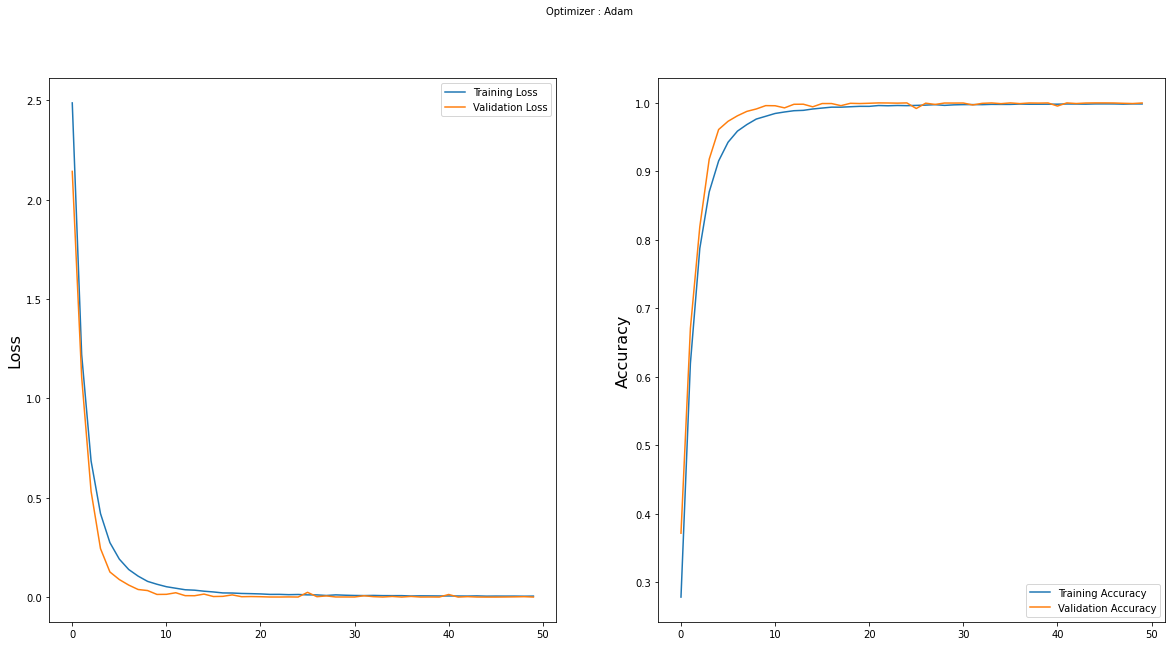

In [ ]:
# plot change in loss and accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np


CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]


def prepare(filepath):
    IMG_SIZE = 48
    img_array = cv2.imread(filepath, cv2. IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) 



model = tf.keras.models.load_model("/content/full.model")

In [ ]:
prediction = model.predict([prepare("/content/asl_alphabet_test/asl_alphabet_test/B_test.jpg")])

print(prediction)
print(CATEGORIES[int(np.argmax(prediction[0]))])

[[2.0544608e-13 9.9999976e-01 1.4140627e-13 2.3501009e-10 1.6015441e-07
  8.2472066e-15 1.2119309e-11 1.5689476e-11 1.3463517e-09 8.2475439e-17
  2.4179039e-13 5.4544999e-16 1.5840526e-13 8.6571679e-12 3.0336085e-14
  1.0305120e-15 1.7417077e-16 1.1193660e-07 6.7855491e-14 1.5074890e-16
  8.4115415e-10 1.6909045e-13 3.9656494e-12 1.1347109e-13 1.4311424e-18
  2.0404457e-16 8.1011040e-12 1.4809043e-10 1.3942097e-13]]
B
